In [10]:
import utils_cfdna
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter

In [11]:
import sys
sys.path.insert(0, "/media/jfrigola/VHIO_USB/projectsVHIO/SWGS/notebooks/v2/")
import utils

#### Define paths

In [12]:
sample_timepoints_path = '/media/jfrigola/VHIO_USB/projectsVHIO/SWGS_cfdna/data/210223 clinica & sequencing summary GOI 2.xlsx'
extractions_sum_path = '/media/jfrigola/VHIO_USB/projectsVHIO/SWGS_cfdna/data/table1.xlsx'
#extractions_sum_path = '/media/jfrigola/VHIO_USB/projectsVHIO/SWGS_cfdna/data/summary cfDNA_extractions_cc_2021119.csv'

#### Read patients clinics

In [13]:
sample_timepoints_df = pd.read_excel(sample_timepoints_path)
sample_timepoints_df = sample_timepoints_df.dropna(how='all')

In [14]:
parsed_clinics_df = utils_cfdna.get_nurias_clinics(sample_timepoints_df)

142304 27 PD
18927106 55 PD
178834 65 PD
11247606 440 PD
10190180 19 PD
11551226 132 PD
11638877 44 PD
13056959 123 PD
11631296 0 PD
11557727 47 PD
19063010 27 PD
11588899 83 PD
11592606 763 Ongoing
11628198 492 PD
18931033 43 PD
11650836 741 Ongoing
11657908 36 PD
11771427 622 Ongoing
11784929 700 Ongoing
11800833 698 Ongoing
11801468 880 Ongoing
11805670 357 PD
11902922 139 PD
11933413 113 PD
11936912 37 PD
11844358 39 PD
11987941 83 PD
10532552 162 PD
12082209 162 PD
16847124 53 PD
12091714 353 Exitus
11456537 58 PD
12704736 126 PD
12101953 132 PD
12501134 49 PD
16670617 175 PD
11911305 13 PD
12504235 40 PD
11844546 398 PD
17095334 42 PD
12201767 154 PD
12325783 41 PD
12497610 128 PD
12598428 363 PD
12599002 41 PD
12602875 24 PD
12609328 18 PD
13434570 259 PD
13595702 40 PD
14665949 496 PD
16616523 463 PD
14789737 64 PD
14141146 140 PD
14827808 1348 Ongoing
15851227 35 PD
15897387 107 PD
15929981 132 PD
16585133 84 PD
14397799 867 Ongoing
16714902 42 PD
16807333 399 PD
16945153 1348

#### Read cfDNA concentration

In [15]:
extractions_sum_df = pd.read_excel(extractions_sum_path)
#extractions_sum_df = pd.read_csv(extractions_sum_path)

In [16]:
my_method = 'ng/ml region tape'

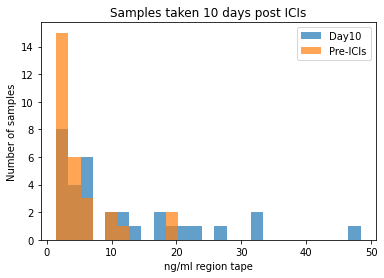

In [50]:
d10_exts_df = extractions_sum_df[extractions_sum_df['category 1'] == 
                                 '10days'][['NHC', my_method, 'sample_ID']].copy()

baseline_exts_df = extractions_sum_df[extractions_sum_df['category 1'] == 'pre_ICIs'].copy()
baseline_exts_df = baseline_exts_df[['NHC', my_method, 'sample_ID']]

met_d10_exts_df = d10_exts_df[d10_exts_df[my_method].isin(['Fail (<0.5)', '#VALUE!']) == False].copy()
met_d10_exts_df[my_method] = met_d10_exts_df[my_method].astype(float)

met_baseline_exts_df = baseline_exts_df[baseline_exts_df[my_method].isin(['Fail (<0.5)', '#VALUE!']) == 
                                         False].copy()
met_baseline_exts_df[my_method] = met_baseline_exts_df[my_method].astype(float)

plt.hist(met_d10_exts_df[my_method], bins=25, alpha=0.7,label='Day10')
plt.hist(met_baseline_exts_df[my_method], bins=25, range=[met_d10_exts_df[my_method].min(),
                                                          met_d10_exts_df[my_method].max()], 
         alpha=0.7, label='Pre-ICIs')

plt.xlabel(my_method)
plt.ylabel('Number of samples')
plt.title('Samples taken 10 days post ICIs')

plt.legend()

plt.show()

#### Correlate ctDNA concentration at 10 days with clinical outcome

high    11
low     11
mid     10
Name: split_category, dtype: int64
mid Median progression-free time: 132.0
high Median progression-free time: 83.0
low Median progression-free time: 496.0


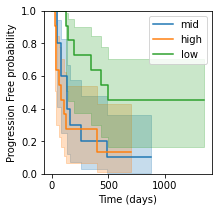

             0         1
0  (mid, high)  0.574835
1   (mid, low)  0.016119
2  (high, low)  0.013878
high    16
low     16
Name: split_category, dtype: int64
high Median progression-free time: 107.0
low Median progression-free time: 349.0


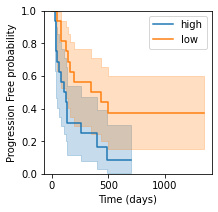

             0         1
0  (high, low)  0.022733


In [40]:
to_km_df = utils_cfdna.split_and_add_clinics(met_d10_exts_df, my_method, 3, ['low', 'mid', 'high'], 
                                             parsed_clinics_df)

if to_km_df is not None:

    my_pvals_df, median_PFS_list = utils.KM_curves_PFS_median_PFS(to_km_df, 'split_category',
                                                                  #plot_print_path,
                                                                  print_path=None,
                                                                  my_fig_size=(3,3))
    print(my_pvals_df)
    
to_km_df = utils_cfdna.split_and_add_clinics(met_d10_exts_df, my_method, 2, ['low', 'high'], 
                                                parsed_clinics_df)

if to_km_df is not None:

    my_pvals_df, median_PFS_list = utils.KM_curves_PFS_median_PFS(to_km_df, 'split_category',
                                                                  #plot_print_path,
                                                                  print_path=None,
                                                                  my_fig_size=(3,3))
    print(my_pvals_df)

#### Correlate ctDNA concentration at baseline with clinical outcome

high    15
low     15
mid     14
Name: split_category, dtype: int64
mid Median progression-free time: 154.0
high Median progression-free time: 64.0
low Median progression-free time: 349.0


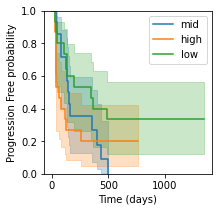

             0         1
0  (mid, high)  0.561034
1   (mid, low)  0.106395
2  (high, low)  0.094740
high    22
low     22
Name: split_category, dtype: int64
high Median progression-free time: 83.0
low Median progression-free time: 154.0


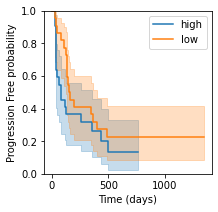

             0         1
0  (high, low)  0.199376


In [41]:
to_km_df = utils_cfdna.split_and_add_clinics(met_baseline_exts_df, my_method, 3, ['low', 'mid', 'high'], 
                                             parsed_clinics_df)

if to_km_df is not None:

    my_pvals_df, median_PFS_list = utils.KM_curves_PFS_median_PFS(to_km_df, 'split_category',
                                                                  #plot_print_path,
                                                                  print_path=None,
                                                                  my_fig_size=(3,3))
    print(my_pvals_df)
    
to_km_df = utils_cfdna.split_and_add_clinics(met_baseline_exts_df, my_method, 2, ['low', 'high'], 
                                                parsed_clinics_df)

if to_km_df is not None:

    my_pvals_df, median_PFS_list = utils.KM_curves_PFS_median_PFS(to_km_df, 'split_category',
                                                                  #plot_print_path,
                                                                  print_path=None,
                                                                  my_fig_size=(3,3))
    print(my_pvals_df)

#### Plot cfDNA evolution at 10 days

In [42]:
merged_cfdna_concs_df = pd.merge(met_baseline_exts_df[['NHC', my_method]], 
                                 met_d10_exts_df[['NHC', my_method]], how='inner', on='NHC',
                                 suffixes=('_baseline', '_day10')
                                )

(-0.8654400000000001, 50.6759)

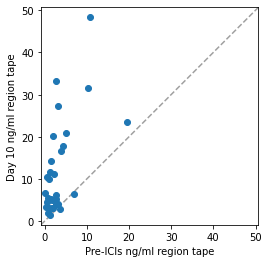

In [43]:
fig, ax = plt.subplots(figsize=(4,4))

plt.scatter(merged_cfdna_concs_df[my_method + '_baseline'], 
            merged_cfdna_concs_df[my_method + '_day10'])

plt.xlabel('Pre-ICIs ' + my_method)
plt.ylabel('Day 10 ' + my_method)

#Plot y=x line
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]

ax.plot(lims, lims, '--', alpha=0.75, zorder=0, c='grey')
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

[Text(0, 0, 'Pre_ICIs'), Text(0, 0, '10 days')]

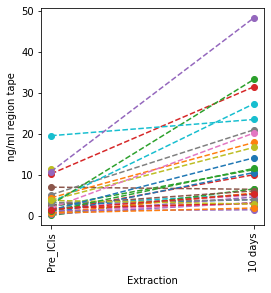

In [44]:
fig, ax = plt.subplots(figsize=(4,4))

for my_index, my_row in merged_cfdna_concs_df.iterrows():
    plt.plot([1,2], [(my_row[my_method + '_baseline']), (my_row[my_method + '_day10'])], '--o')
    
ax.set_xticks([1,2])
ax.set_ylabel(my_method)
ax.set_xlabel('Extraction')

ax.set_xticklabels(['Pre_ICIs', '10 days'], rotation=90)

In [45]:
merged_cfdna_concs_df['pre_10d_fc'] = (merged_cfdna_concs_df[my_method + '_baseline']/
                                       merged_cfdna_concs_df[my_method + '_day10'])

low     11
high    10
mid     10
Name: split_category, dtype: int64
mid Median progression-free time: 83.0
high Median progression-free time: 139.0
low Median progression-free time: 492.0


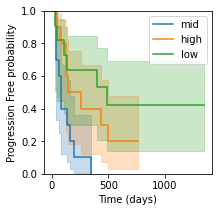

             0         1
0  (mid, high)  0.027440
1   (mid, low)  0.005636
2  (high, low)  0.371989
low     16
high    15
Name: split_category, dtype: int64
high Median progression-free time: 162.0
low Median progression-free time: 132.0


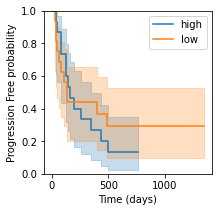

             0        1
0  (high, low)  0.65223


In [46]:
to_km_df = utils_cfdna.split_and_add_clinics(merged_cfdna_concs_df, 'pre_10d_fc', 3, ['low', 'mid', 'high'], 
                                             parsed_clinics_df)

if to_km_df is not None:

    my_pvals_df, median_PFS_list = utils.KM_curves_PFS_median_PFS(to_km_df, 'split_category',
                                                                  #plot_print_path,
                                                                  print_path=None,
                                                                  my_fig_size=(3,3))
    print(my_pvals_df)
    
to_km_df = utils_cfdna.split_and_add_clinics(merged_cfdna_concs_df, 'pre_10d_fc', 2, ['low', 'high'], 
                                                parsed_clinics_df)

if to_km_df is not None:

    my_pvals_df, median_PFS_list = utils.KM_curves_PFS_median_PFS(to_km_df, 'split_category',
                                                                  #plot_print_path,
                                                                  print_path=None,
                                                                  my_fig_size=(3,3))
    print(my_pvals_df)

#### Correlate cfDNA ammount and ctDNA fraction at baseline

In [54]:
ichor_results_path = '/media/jfrigola/VHIO_USB/ichorCNA_20210906_500kb_cfDNA_plasma_pon_subcl_90/'
samples_tfrac_df = utils_cfdna.get_samples_tfraction(ichor_results_path)

In [55]:
cfdna_ctdna_df = pd.merge(baseline_exts_df, samples_tfrac_df, on='sample_ID', how='left')

Text(0.5, 1.0, 'Pre-ICIs samples')

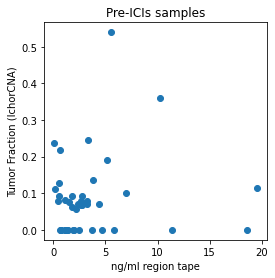

In [57]:
fig, ax = plt.subplots(figsize=(4,4))

plt.scatter(cfdna_ctdna_df[my_method], cfdna_ctdna_df['tfraction'])
plt.xlabel(my_method)
plt.ylabel('Tumor Fraction (IchorCNA)')
plt.title('Pre-ICIs samples')

#### For patients with detectable ctDNA, compute ctDNA concentration

In [63]:
cfdna_ctdna_df['ctdna'] =  cfdna_ctdna_df['tfraction'] * cfdna_ctdna_df[my_method] 

tfraction cannot be split into 3 groups
low     23
high    22
Name: split_category, dtype: int64
high Median progression-free time: 84.0
low Median progression-free time: 197.0


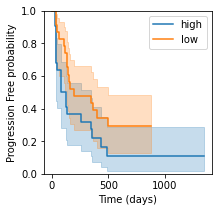

             0         1
0  (high, low)  0.067813


In [66]:
to_km_df = cfdna_ctdna_df.copy()
to_km_df = utils_cfdna.split_and_add_clinics(to_km_df, 'tfraction', 3, ['low', 'mid', 'high'], 
                                             parsed_clinics_df)

if to_km_df is not None:

    my_pvals_df, median_PFS_list = utils.KM_curves_PFS_median_PFS(to_km_df, 'split_category',
                                                                  #plot_print_path,
                                                                  print_path=None,
                                                                  my_fig_size=(3,3))
    print(my_pvals_df)
    
to_km_df = cfdna_ctdna_df.copy()
to_km_df = utils_cfdna.split_and_add_clinics(to_km_df, 'tfraction', 2, ['low', 'high'], 
                                                parsed_clinics_df)

if to_km_df is not None:

    my_pvals_df, median_PFS_list = utils.KM_curves_PFS_median_PFS(to_km_df, 'split_category',
                                                                  #plot_print_path,
                                                                  print_path=None,
                                                                  my_fig_size=(3,3))
    print(my_pvals_df)

ctdna cannot be split into 3 groups
high    21
low     21
Name: split_category, dtype: int64
high Median progression-free time: 126.0
low Median progression-free time: 349.0


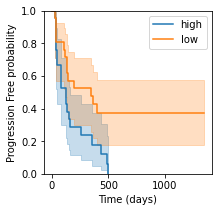

             0         1
0  (high, low)  0.012702


In [65]:
to_km_df = cfdna_ctdna_df.copy()
to_km_df = utils_cfdna.split_and_add_clinics(to_km_df, 'ctdna', 3, ['low', 'mid', 'high'], 
                                             parsed_clinics_df)

if to_km_df is not None:

    my_pvals_df, median_PFS_list = utils.KM_curves_PFS_median_PFS(to_km_df, 'split_category',
                                                                  #plot_print_path,
                                                                  print_path=None,
                                                                  my_fig_size=(3,3))
    print(my_pvals_df)
    
to_km_df = cfdna_ctdna_df.copy()
to_km_df = utils_cfdna.split_and_add_clinics(to_km_df, 'ctdna', 2, ['low', 'high'], 
                                                parsed_clinics_df)

if to_km_df is not None:

    my_pvals_df, median_PFS_list = utils.KM_curves_PFS_median_PFS(to_km_df, 'split_category',
                                                                  #plot_print_path,
                                                                  print_path=None,
                                                                  my_fig_size=(3,3))
    print(my_pvals_df)